## Boston Marathon Data:

### 1. Importing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sys
import gc
from IPython.display import Markdown
%matplotlib inline

In [2]:
df = pd.read_csv('2014BostonMarathon.csv')

### 2. Exploratory Analysis and Cleaning:

#### A. Null Values and Dropping Some:

In [3]:
# Looking at null-values:

starting_row_ct = len(df)
starting_nulls = pd.DataFrame(df.isna().sum())
starting_nulls = starting_nulls.where(starting_nulls.values != 0).dropna()

   Here is our starting row count: {{starting_row_ct}}.  
    
   We will wait before doing anything with a significant number of null-values, but it is good to know where
    our null-values are before setting out on further exploration. In this table we have removed all of the
    columns which do not have null-values, and isolated the columns that do have null-values: {{starting_nulls}}
        
   In the cell below, we will drop our 'Citizenship' feature (since it is similar to/overly-correlated with 
    our 'Country' feature). We will also drop the singular null-value in 'City', as it will be inconsequential
    and will lesson our errors as we move forward.

In [4]:
# Dropping 'Citizenship':

df.drop('ctz', axis = 1, inplace = True)

# Dropping the null-value in 'City':

df.dropna(axis = 0, how = 'any', subset = ['city'], inplace = True)

#### B. Understanding the Structure and Distrubution:

In [5]:
object_descr = df.describe(include = 'O')
num_descr = df.describe()
objects = pd.DataFrame(df.dtypes.loc[df.dtypes == 'O'])
ints = pd.DataFrame(df.dtypes.loc[df.dtypes == 'int64'])
floats = pd.DataFrame(df.dtypes.loc[df.dtypes == 'float'])

> Here, we have our feature-set and its corresponding data-types.  We can see that a lot
of our columns which we would expect to be numerical are, in fact, object-types. This shouldn't be too troublesome, but is always helpful to know as we move forward (We will actually be changing these to numeric columns in the next cells below).

<table width = '600' height = '100'  align = 'center'>
    <tr>
    </tr>
    <tr>
        <td> {{objects}} </td>
        <td> {{ints}}    </td>
        <td> {{floats}} </td>
    </tr>
</table>

>Here we have our descriptive statistics:
 Based on these, we can see that a majority of the participants are male, and the most
 predominant state represented was Massachusets (makes sense). 


<table width = '1000' align = 'center'>
    <tr> 
    </tr>
    <tr>
        <table align = 'center' >
            <tr>  
                <td style = 'text-align:center'> Numeric Columns </td>
            </tr>
            <tr>
                <td> {{num_descr}} </td>
            </tr>
        </table>
    </tr>
</table>


<table width = '1400' align = 'center'>
    <tr> 
        <table align = 'center'>
            <tr>
               <td style = 'text-align:center'> Object Columns </td> 
            </tr>
            <tr>
               <td> {{object_descr}} </td>
            </tr>
        </table>
    </tr>    
</table>



#### C. Dash Control:

In [6]:
# Had to take care of some dashes within the dataset ('-'), which were making it difficult to run models.  
# Did not want to drop these since that would cause a lot of information loss. Saved them to their own dataframe
# for now and then dropped them from the main data-fram since they only made up 336 rows (i.e. 1.05% of the data).

dashes = df.loc[(df['5k'] == '-') | (df['10k'] == '-') | (df['20k'] == '-') | (df['half'] == '-') |
       (df['25k'] == '-') | (df['30k'] == '-') | (df['35k'] == '-') | (df['40k'] == '-')]

df_2 = df.drop(index = dashes.index)

#### D. Dummy Control:

In [7]:
# Had to do some grouping to control dummies:
EUR = ['TUR', 'HUN', 'LUX', 'UKR', 'BLR', 'CRO', 'EST', 'SVK', 'SLO', 'POR', 'GRE', 'CZE', 'ROU', 'LIE',
       'POL', 'AUT', 'NOR', 'BEL', 'FIN', 'ISL']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in EUR), other = 'EUR')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in EUR), other = 'EUR')

SEA = ['PHI', 'THA', 'MAS', 'INA', 'NZL']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in SEA), other = 'SEA')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in SEA), other = 'SEA')

AFR = ['EGY', 'ZIM', 'TAN', 'ETH', 'MAR', 'KEN', 'RSA']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in AFR), other = 'AFR')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in AFR), other = 'AFR')

CAM = ['PAN', 'DOM', 'BAH', 'CAY', 'VGB', 'BAR', 'ESA', 'GUA', 'CRC', 'BER']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in CAM), other = 'CAM')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in CAM), other = 'CAM')

SAM = ['ECU', 'BOL', 'TRI', 'PER', 'URU', 'ARG', 'CHI', 'VEN']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in SAM), other = 'SAM')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in SAM), other = 'SAM')

MEA = ['QAT', 'BRN', 'ISR', 'UAE']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in MEA), other = 'MEA')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in MEA), other = 'MEA')

ASI = ['IND', 'RUS', 'TPE', 'SIN']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in ASI), other = 'ASI')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in ASI), other = 'ASI')

#### E. Error NaN/Inf Error Mitigation:

In [8]:
# Was getting an NaN, Inf, Value Too Large error when running the preliminary models. So: 

df_2['pace'] = pd.to_numeric(df_2['pace'], downcast = 'float')
df_2['official'] = pd.to_numeric(df_2['official'], downcast = 'float')
df_2['5k'] = pd.to_numeric(df_2['5k'], downcast = 'float')
df_2['10k'] = pd.to_numeric(df_2['10k'], downcast = 'float')
df_2['20k'] = pd.to_numeric(df_2['20k'], downcast = 'float')
df_2['half'] = pd.to_numeric(df_2['half'], downcast = 'float')
df_2['25k'] = pd.to_numeric(df_2['25k'], downcast = 'float')
df_2['30k'] = pd.to_numeric(df_2['30k'], downcast = 'float')
df_2['35k'] = pd.to_numeric(df_2['35k'], downcast = 'float')
df_2['40k'] = pd.to_numeric(df_2['40k'], downcast = 'float')


In [9]:
# Memory Mitigation (Resource cited below):

ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

cleaner = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], 
                 key=lambda x: x[1], reverse=True)

In [10]:
del object_descr, objects, num_descr, ints, floats, EUR, CAM, SAM, AFR, SEA, ASI, MEA 
gc.collect()

109

#### F. Preliminary Visualizations:

##### F-1. Correlation:

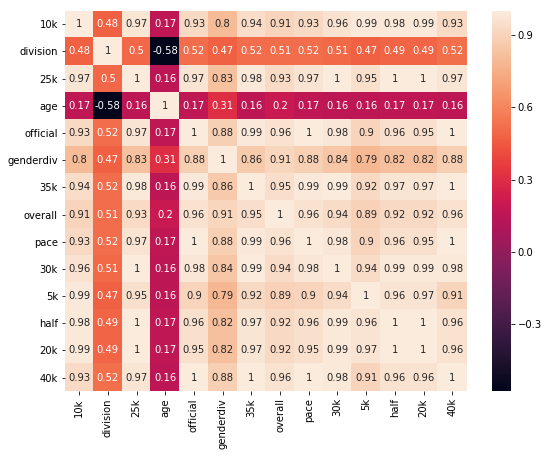

In [11]:
plt.figure(figsize = (9, 7))
sns.heatmap(df_2.corr(), annot = True)
plt.show()

##### F-2. Univariate Distributions:

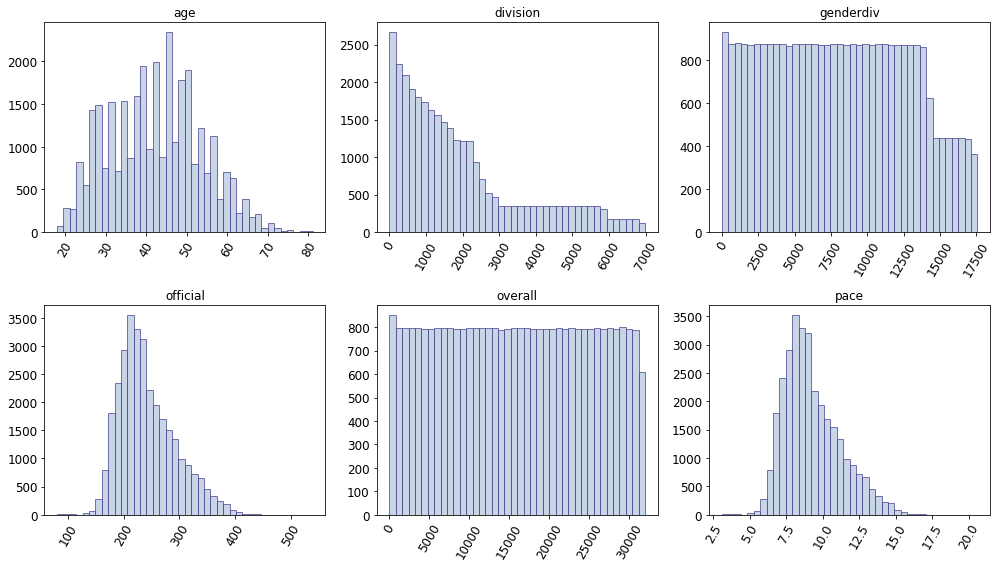

In [12]:
# Looking at our numeric columns:

numeric_cols = df_2[['division', 'age', 'official', 'genderdiv', 'overall', 'pace']]

numeric_cols.hist(bins = 40,
                  figsize = (14, 8), layout = [2, 3],
                  xlabelsize = 12, ylabelsize = 12, 
                  xrot = 60,
                  color = 'lightsteelblue', edgecolor = 'darkslateblue',
                  grid = False, alpha = .7)
plt.tight_layout()
plt.show()

It makes sense here that 'genderdiv' and 'overall' would be so evenly dispersed, given that gender is split relatively evenly for the participants in 2014.  Overall placement as well would be distributed evenly since you increment each placement each time you add one person.  Thus, each bin in the histogram would get a similar amount of participants.
'Official,' 'age,' 'division' and 'pace,' however, have more normal distributions, as we see above.

In [13]:
# Looking at our object columns:
    # It was ultimately necessary to impute the mode for these columns for our visualizations.
    # This was down with a copied dataframe since we would deal with the NaN's differently just before modeling.

from sklearn.impute import SimpleImputer

graph_df = pd.DataFrame(df_2)

mode_imputer = SimpleImputer(strategy = 'most_frequent')
nan_columns_1 = mode_imputer.fit_transform(graph_df[['5k', '10k', '20k', 'half', '25k','35k','30k', '40k']])
nan_columns_1 = pd.DataFrame(nan_columns_1)


# Putting these back into our main dataframe:
graph_df['5k'] = nan_columns_1[[0]]
graph_df['10k'] = nan_columns_1[[1]]
graph_df['20k'] = nan_columns_1[[2]]
graph_df['half'] = nan_columns_1[[3]]
graph_df['25k'] = nan_columns_1[[4]]
graph_df['35k'] = nan_columns_1[[5]]
graph_df['30k'] = nan_columns_1[[6]]
graph_df['40k'] = nan_columns_1[[7]]

# Making a subset of the dataframe for plotting purposes:

checkpoints = graph_df[['5k', '10k', '20k', 'half', '25k','35k','30k', '40k']]

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [14]:
fonts = {'fontsize':13}
kwargs = {'linestyle':'-'}
rc_grapher = {'grid.color':'ghostwhite',
              'axes.facecolor':'lavender', 
              'boxplot.boxprops.linewidth': .55}

def grapher():
    
    with sns.axes_style('whitegrid', rc = rc_grapher):
        figure = plt.figure(figsize = (14, 7))
        sns.boxenplot(data = checkpoints, **kwargs)
        plt.tick_params(axis = 'both', labelsize = 13)
        plt.ylabel("Time in Minutes", fontdict = fonts)
        plt.xlabel("Distance in Meters")
        plt.show()

blah blah {{grapher()}}

In [ ]:
categoricals = df[['gender', 'state', 'country', 'city']]


In [ ]:
for column in numeric_cols:
    plt.hist(numeric_cols[column])

##### F-3. Multivariate Distributions:

In [33]:
pair_df = df[['10k', 'division', '25k', 'gender', 'age', 'official', 'genderdiv', '35k', 
              'overall', 'pace', 'state', '30k', '5k', 'half', '20k', 'country', 'city', '40k']]

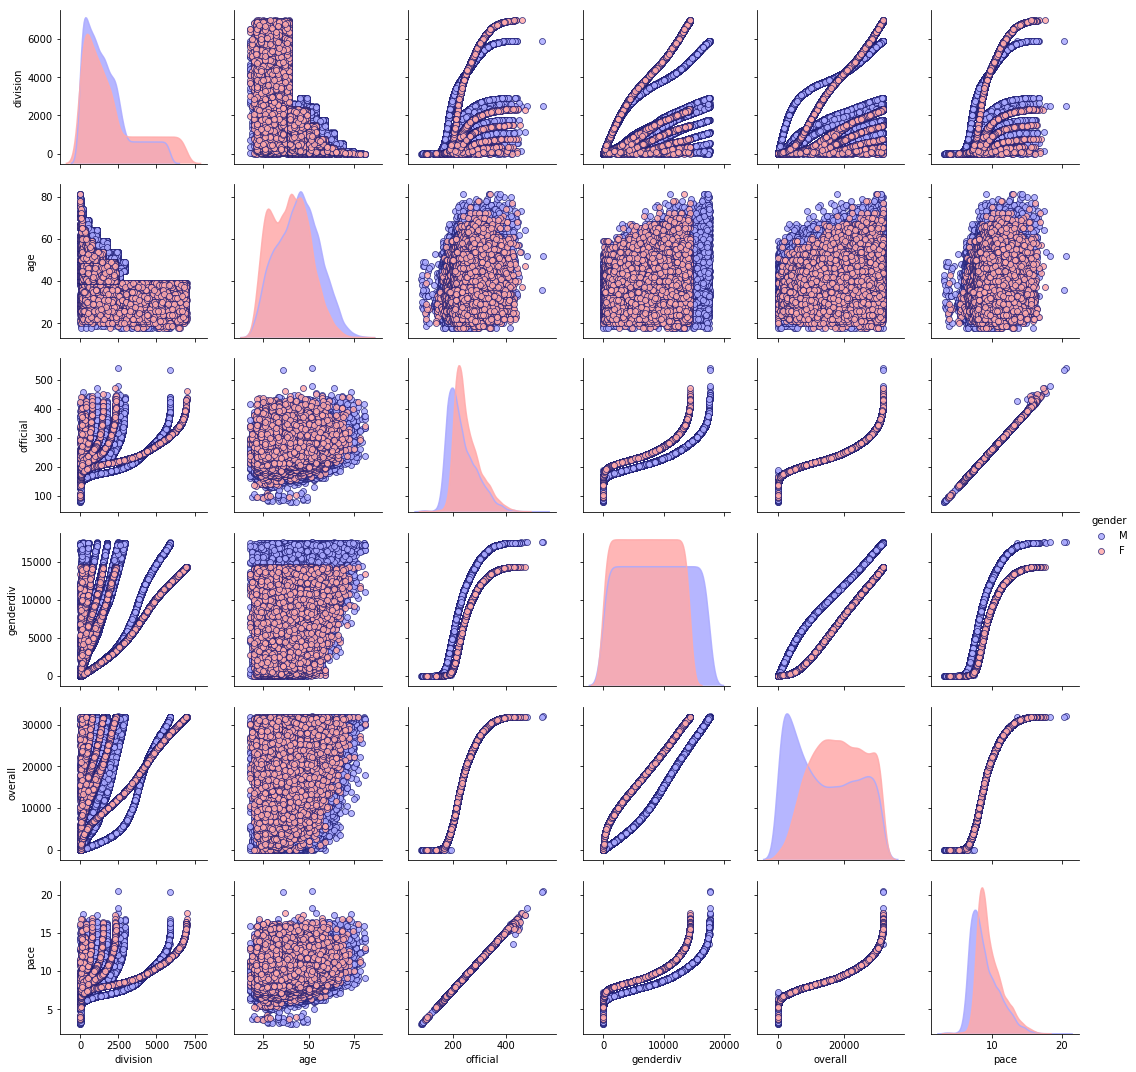

In [192]:
sns.pairplot(pair_df, hue = 'gender', palette = 'bwr', plot_kws = {'alpha':.85, 'linewidths':.15, 
                                                                   'edgecolor':'midnightblue'},
                                                       diag_kws = {'alpha':.85})
plt.show()

### Models:

In [169]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.cluster import KMeans, MeanShift, AffinityPropagation, SpectralClustering, MiniBatchKMeans


# Dropping our Na's (not many) and placing 'Foreign' where the state isn't listed.

df['state'].fillna('Foreign', inplace = True)
df_2['state'].fillna('Foreign', inplace = True)

df = df.dropna(axis = 1)
df_2 = df_2.dropna(axis = 1)

In [178]:
# Getting our dummies and sub-sampling the data:

X = pd.get_dummies(data = df_2.drop(['name', 'bib', 'state', 'city'], axis = 1))

feature_dict = {'division':'div', 'official':'ofl', 'genderdiv':'gendiv', 'gender_F':'F', 'gender_M':'M', 
                'country_AFR':'AFR', 'country_ASI':'ASI', 'country_AUS':'AUS', 'country_BRA':'BRA', 
                'country_CAM':'CAM', 'country_CAN':'CAN', 'country_CHN':'CHN', 'country_COL':'COL', 
                'country_DEN':'DEN', 'country_ESP':'ESP', 'country_EUR':'EUR', 'country_FRA':'FRA', 
                'country_GBR':'GBR', 'country_GER':'GER', 'country_HKG':'HKG', 'country_IRL':'IRL', 
                'country_ITA':'ITA', 'country_JPN':'JPN', 'country_KOR':'KOR', 'country_MEA':'MEA', 
                'country_MEX':'MEX', 'country_NED':'NED', 'country_SAM':'SAM', 'country_SEA':'SEA', 
                'country_SUI':'SUI', 'country_SWE':'SWE', 'country_USA':'USA'}

X = pd.DataFrame(X.rename(feature_dict, axis = 'columns'))


subset_1 = X.sample(frac = .5)

#### A. KMeans:

##### A-1. Fitting the Models:

In [179]:
KMeans_mini_1 = MiniBatchKMeans(n_clusters = 3)
KMeans_mini_1.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [180]:
KMeans_mini_2 = MiniBatchKMeans(n_clusters = 7)
KMeans_mini_2.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=7,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [181]:
KMeans_mini_3 = MiniBatchKMeans(n_clusters = 12)
KMeans_mini_3.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=12,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

##### A-2. Exploring the Results:

In [193]:
# Creating a copy of our dummies dataframe so we can explore correlation of these results with our original 
# dataframe and our dummied dataframe: 

Xx = pd.DataFrame(X)

df_2['KMeans_3cl'] = KMeans_mini_1.labels_
df_2['KMeans_7cl'] = KMeans_mini_2.labels_
df_2['KMeans_12cl'] = KMeans_mini_3.labels_

Xx['KMeans_3cl'] = KMeans_mini_1.labels_
Xx['KMeans_7cl'] = KMeans_mini_2.labels_
Xx['KMeans_12cl'] = KMeans_mini_3.labels_

# Looking at the value counts of our clusters:
KMeans_val_cts = df_2[['KMeans_3cl', 'KMeans_7cl', 'KMeans_12cl']]

# Getting descriptive statistics on them:
KMeans_descr = df_2[['KMeans_3cl', 'KMeans_7cl', 'KMeans_12cl']].describe()

# Extracting correlations and visualizing them:
KM3_corr = Xx.corr().KMeans_3cl
KM7_corr = Xx.corr().KMeans_7cl
KM12_corr = Xx.corr().KMeans_12cl

significant_3c = KM3_corr.loc[(KM3_corr >=.35)|(KM3_corr <= -.35)]

non_significant_3c = KM3_corr.loc[(KM3_corr <=.35)&(KM3_corr >= -.35)]


In [253]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.

In [334]:
Xx.corr()

,div,age,ofl,gendiv,overall,pace,KMeans_3cl,KMeans_7cl,KMeans_12cl,F,...,JPN,KOR,MEA,MEX,NED,SAM,SEA,SUI,SWE,USA
div,1.000000,-0.576437,0.519382,0.471162,0.514794,0.519412,0.145225,-0.016837,0.158033,0.123775,...,-0.047334,-0.006856,-0.015121,-0.010370,-0.013854,-0.023001,-0.007510,-0.012233,-0.025939,0.151468
age,-0.576437,1.000000,0.167333,0.307497,0.201194,0.167313,0.203078,-0.086436,0.010284,-0.208847,...,0.072298,0.035929,0.015862,0.011036,0.016412,0.011584,0.004752,0.007219,0.013216,-0.154921
ofl,0.519382,0.167333,1.000000,0.882600,0.959718,0.999994,0.268113,-0.042896,0.032389,0.205381,...,0.002321,0.026172,-0.005366,-0.016262,-0.016595,-0.020545,-0.008199,-0.016222,-0.024545,0.092972
gendiv,0.471162,0.307497,0.882600,1.000000,0.908187,0.882606,0.335869,-0.065104,0.130113,-0.169491,...,0.016489,0.036864,-0.002248,-0.007851,-0.002287,-0.018443,-0.000823,-0.007717,-0.020691,0.041271
overall,0.514794,0.201194,0.959718,0.908187,1.000000,0.959737,0.398195,-0.070223,-0.022346,0.246242,...,0.006519,0.027474,-0.005686,-0.015587,-0.015614,-0.021903,-0.006282,-0.014900,-0.029624,0.085458
pace,0.519412,0.167313,0.999994,0.882606,0.959737,1.000000,0.268128,-0.042898,0.032405,0.205412,...,0.002317,0.026195,-0.005355,-0.016299,-0.016594,-0.020518,-0.008190,-0.016186,-0.024545,0.092986
KMeans_3cl,0.145225,0.203078,0.268113,0.335869,0.398195,0.268128,1.000000,-0.133949,-0.017370,0.213879,...,0.007294,0.009152,0.006340,0.003013,0.002248,-0.015174,-0.004519,-0.007216,-0.014984,0.006438
KMeans_7cl,-0.016837,-0.086436,-0.042896,-0.065104,-0.070223,-0.042898,-0.133949,1.000000,-0.220718,-0.098904,...,0.009301,-0.003283,0.001203,-0.000109,0.003959,-0.004267,0.009181,0.009095,0.016367,0.005146
KMeans_12cl,0.158033,0.010284,0.032389,0.130113,-0.022346,0.032405,-0.017370,-0.220718,1.000000,-0.260238,...,-0.003183,0.002126,0.003987,-0.004331,0.006564,-0.003873,-0.000581,0.006061,-0.000630,-0.017800
F,0.123775,-0.208847,0.205381,-0.169491,0.246242,0.205412,0.213879,-0.098904,-0.260238,1.000000,...,-0.024182,-0.021697,-0.006712,-0.019474,-0.031052,-0.010404,-0.015418,-0.015446,-0.024430,0.096511


In [331]:
KM_kws = {'alpha': .7,
            'color': 'slateblue',
            'edgecolor': 'midnightblue',
            'linewidth': .15}
KM_font = {'fontsize':13}

def KMcorr_plotter():
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 6), sharey = True)
    fig.subplots_adjust(hspace = .15, wspace = .15)

    sns.distplot(KM3_corr, ax = ax1, kde = False, hist_kws = KM_kws, axlabel = 'Coefficient Value')
    ax1.set_title('3 Clusters', fontdict = KM_font)
    ax1.set_ylabel('Number of Features with Coefficient Value', fontdict = KM_font)

    sns.distplot(KM7_corr, ax = ax2, kde = False, hist_kws = KM_kws, axlabel = 'Coefficient Value')
    ax2.set_title('7 Clusters', fontdict = KM_font)

    sns.distplot(KM12_corr, ax = ax3, kde = False, hist_kws = KM_kws, axlabel = 'Coefficient Value')
    ax3.set_title('12 Clusters', fontdict = KM_font)

    plt.show()

def KMcorr_plotter2():
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (22, 6), sharey = True)
    fig.subplots_adjust(hspace = .15, wspace = .15)

    sns.countplot(x = Xx['KMeans_3cl'], ax = ax1)
    ax1.set_title('3 Clusters', fontdict = hist_font)
    ax1.set_ylabel('Number of Observations in each Cluster', fontdict = hist_font)

    sns.countplot(x = Xx['KMeans_7cl'], ax = ax2)
    ax2.set_title('7 Clusters', fontdict = hist_font)
    ax2.set_ylabel('')

    sns.countplot(x = Xx['KMeans_12cl'], ax = ax3)
    ax3.set_title('12 Clusters', fontdict = hist_font)
    ax3.set_ylabel('')

    plt.show()

In [361]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.

In [362]:


plt.figure(figsize = (18, 9))

plt.plot(Xx.corr().KMeans_3cl)
plt.plot(Xx.corr().KMeans_7cl)
plt.plot(Xx.corr().KMeans_12cl)

TypeError: 'RcParams' object is not callable

<Figure size 1296x648 with 0 Axes>

In [ ]:
fonts = {'fontsize':13}
kwargs = {'linestyle':'-'}
rc_KM = {'grid.color':'ghostwhite',
              'axes.facecolor':'lavender', 
              'boxplot.boxprops.linewidth': .55}

def KM3_grapher():
    
    with sns.axes_style(rc = rc_KM):
        figure = plt.figure(1, 2, figsize = (14, 9))
        
        ax1 = sns.distplot(data = , **kwargs)
        plt.tick_params(axis = 'both', labelsize = 13)
        plt.ylabel('', fontdict = fonts)
        plt.xlabel('')
        
        ax2 = sns.lineplot()
        plt.tick_params(axis = 'both', labelsize = 13)
        plt.ylabel('', fontdict = fonts)
        plt.xlabel('')
        plt.show()

#### B. MeanShift:

In [ ]:
subset_2 = X.sample(frac = .2)

In [ ]:
MeanShift_1 = MeanShift()
MeanShift_1.fit(subset_2)

In [ ]:
MeanShift_2 = MeanShift()
MeanShift_2.fit(subset_2)

In [ ]:
MeanShift_3 = MeanShift()
MeanShift_2.fit(subset_2)

#### C. Spectral Clustering:

In [ ]:
Spectral_1 = SpectralClustering()

In [ ]:
Spectral_2 = SpectralClustering()

In [ ]:
Spectral_3 = SpectralClustering()

#### D. Affinity Propagation: